In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
df = pd.read_csv('dataset/Salary_dataset.csv', index_col=0)
# df = pd.read_csv('dataset/placement.csv')
print(len(df))
df.head()

30


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


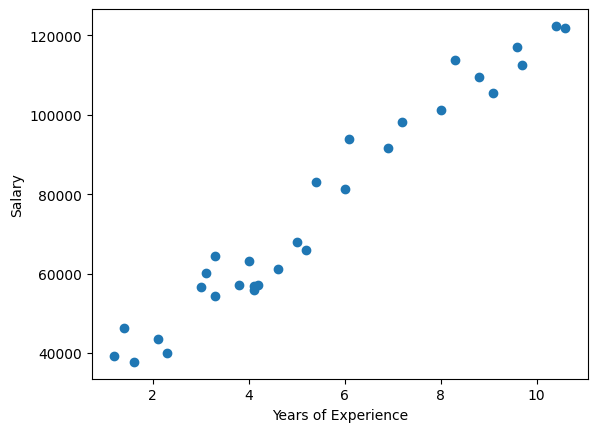

In [137]:
x = np.array(df.iloc[:,0].values)
y = np.array(df.iloc[:,1].values)

plt.scatter(x,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
# plt.figure(figsize=(2,2))
plt.show()

In [124]:
# polynomial degree
# k = 4

def sumPot(x: list, pot: int):
    if pot == 0:
        return len(x)
    else:
        soma = 0
        for i in range(len(x)):
            soma += x[i]**pot
        return soma

def sumYVec(y: list, x:list, pot: int):
    soma = 0
    for i in range(len(y)):
        soma += y[i]*(x[i]**pot)
    return soma

def wVec(x: list, y: list, k: int) -> list:
    # matrix A
    A = []
    # print(A)
    for m in range(k+1):
        linha = []
        for n in range(k+1):
            # print('m='+str(m)+';n='+str(n))
            linha.append(round(sumPot(x, m+n),2))
        A.append(linha)
    # print(A)
    # A^(-1): A inverse
    aInv = np.linalg.inv(A)
    # print(aInv)

    # y vector
    yVec = []
    for i in range(k+1):
        yVec.append(round(sumYVec(y, x, i),2))
    # print(yVec)

    # w = A^(-1) x Y
    w = np.array(np.dot(aInv, yVec))
    # print('w = '+str(w))
    return w

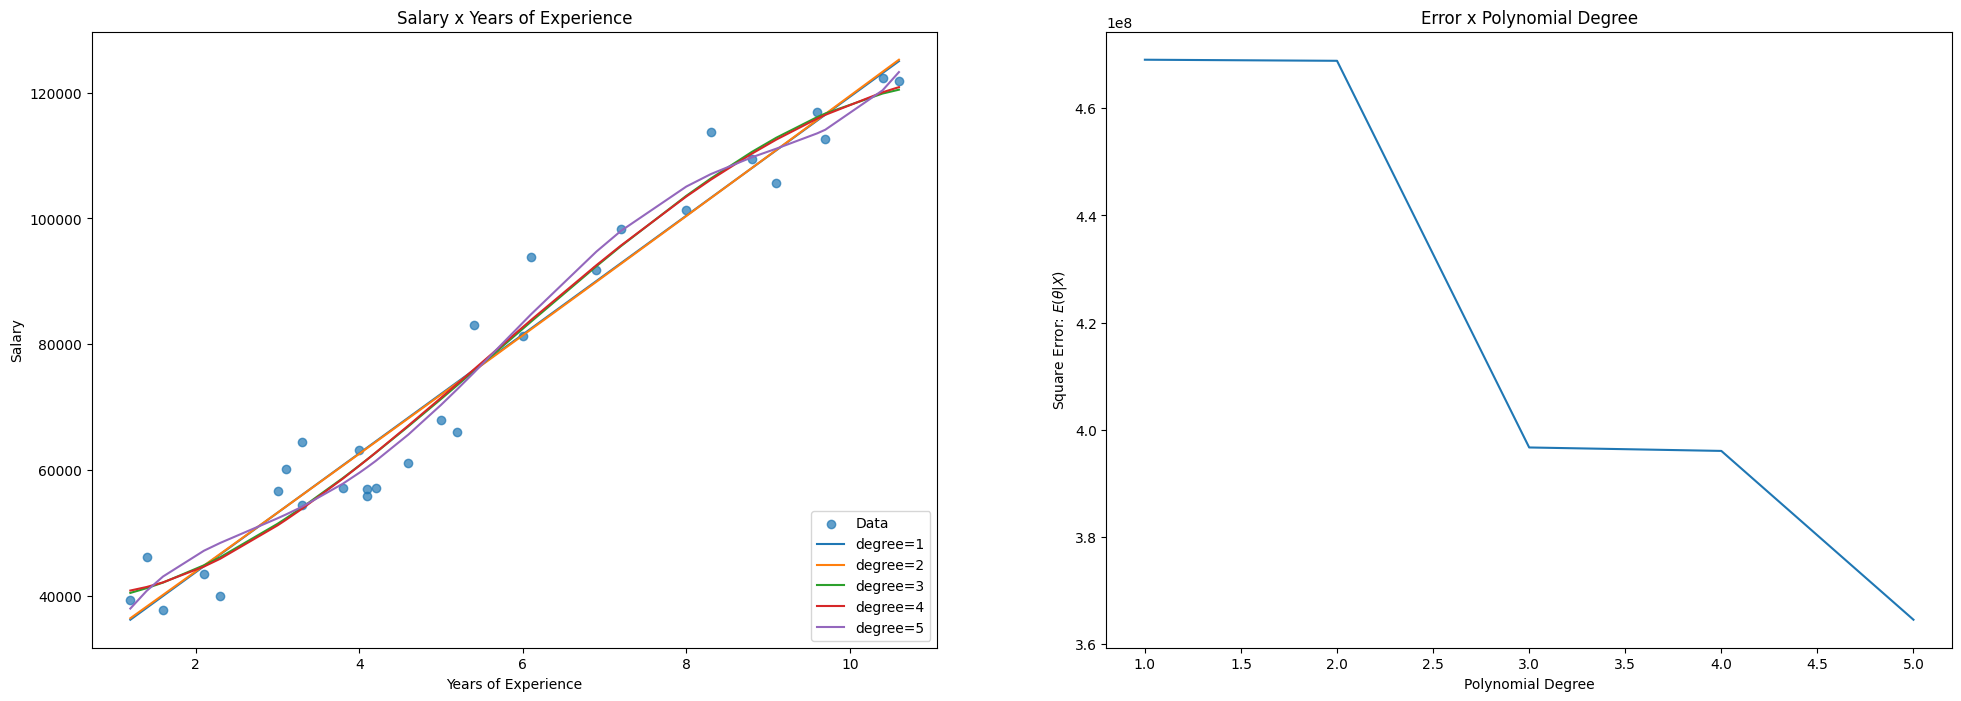

In [136]:
ks = [1,2,3,4,5]
error = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
ax1.scatter(x,y, alpha=0.7, label='Data')

for k in ks:
    predY = []
    w = wVec(x, y, k)
    for point in x:
        soma = 0
        for i in range(k+1):
            soma += w[i]*(point**i)
        predY.append(soma)
    ax1.plot(x, predY, label='degree='+str(k))

    # square error
    erro = 0
    for i in range(len(y)):
        erro += (y[i]-predY[i])**2
    error.append(erro/2)

ax2.plot(ks, error)
ax2.set_title('Error x Polynomial Degree')
ax2.set(xlabel='Polynomial Degree', ylabel="Square Error: $E(\\theta|X)$")

ax1.set_title('Salary x Years of Experience')
ax1.set(xlabel='Years of Experience', ylabel='Salary')
ax1.legend(loc='lower right')
plt.show()
